# Data Preprocessing 
---

* 배포한 모듈에 대한 변경사항이 있는 경우 반드시 다음 명령어를 실행하여 변경사항이 배포된 버전에 반영되도록 하자
```
>>> python setup.py sdist
>>> python setup.py install
```

---
* data-preprocessing 과정에 필요한 module들을 import 하자 

In [1]:
from utils import Preprocess
from utils import FileIO
from utils import GlobalParameter
from utils import Graph
%matplotlib inline
import os

/Users/JH/Documents/GitHub/EnergyData_jhyun/energy_data_venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


---
* 모든 file은 GlobalParameter.Repository_Path의 경로 아래에 저장하고 불러온다
* 다음 과정은 주어진 경로 아래에 저장된 특정 file을 지정하고 확인해보는 과정이다

In [2]:
file_path = os.path.join(GlobalParameter.Repository_Path, 'VTT')
file_name = 'VTT_GW1_HA10_VM_EP_KV_K.bin'
file_path = os.path.join(file_path, file_name)

file_path

'/Users/JH/Documents/GitHub/EnergyData_jhyun/repository/VTT/VTT_GW1_HA10_VM_EP_KV_K.bin'

---
* 해당 file의 data를 graph를 통해 확인해보자

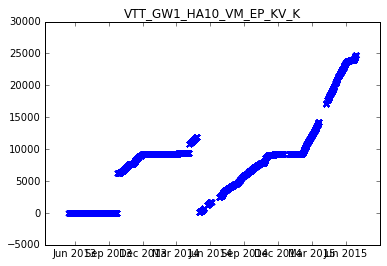

In [3]:
Graph.Show.bin2graph(file_path)

---
* 해당 file의 data를 직접 출력하여 확인해보자

In [4]:
data_dictionary = FileIO.Load.unpickling(file_path)

data_dictionary

{'file_name': 'VTT_GW1_HA10_VM_EP_KV_K',
 'ts': array([[datetime.datetime(2013, 5, 15, 10, 37, 23), 23, 37, ..., 2, 15, 5],
        [datetime.datetime(2013, 5, 15, 10, 42, 30), 30, 42, ..., 2, 15, 5],
        [datetime.datetime(2013, 5, 15, 10, 47, 30), 30, 47, ..., 2, 15, 5],
        ..., 
        [datetime.datetime(2015, 6, 30, 0, 46, 32), 32, 46, ..., 1, 30, 6],
        [datetime.datetime(2015, 6, 30, 0, 51, 32), 32, 51, ..., 1, 30, 6],
        [datetime.datetime(2015, 6, 30, 0, 56, 32), 32, 56, ..., 1, 30, 6]], dtype=object),
 'value': array([     0.,      0.,      0., ...,  24826.,  24826.,  24826.])}

---
* 전처리의 첫 단계인 scaling을 실행해보자
* scaling을 통해 data의 모든 value값들이 절댓값 GlobalParameter.Scale_Size 사이 값으로 조정된다
* scaling의 크기는 GlobalParameter.Scale_Size에서 확인/변경 가능하다

In [5]:
GlobalParameter.Scale_Size

100

In [6]:
data_dictionary = Preprocess.scaling(data_dictionary)

data_dictionary

{'file_name': 'VTT_GW1_HA10_VM_EP_KV_K',
 'ts': array([[datetime.datetime(2013, 5, 15, 10, 37, 23), 23, 37, ..., 2, 15, 5],
        [datetime.datetime(2013, 5, 15, 10, 42, 30), 30, 42, ..., 2, 15, 5],
        [datetime.datetime(2013, 5, 15, 10, 47, 30), 30, 47, ..., 2, 15, 5],
        ..., 
        [datetime.datetime(2015, 6, 30, 0, 46, 32), 32, 46, ..., 1, 30, 6],
        [datetime.datetime(2015, 6, 30, 0, 51, 32), 32, 51, ..., 1, 30, 6],
        [datetime.datetime(2015, 6, 30, 0, 56, 32), 32, 56, ..., 1, 30, 6]], dtype=object),
 'value': array([   0.,    0.,    0., ...,  100.,  100.,  100.])}

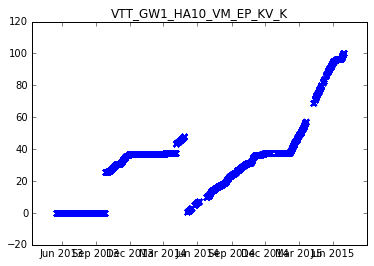

In [7]:
Graph.Show.dic2graph(data_dictionary)

---
* 전처리의 두 번째 단계인 normalization을 실행해보자
* normalization을 통해 data의 모든 ts가 GlobalParameter.Normalization_Interval의 일정한 간격으로 조정된다
* 간격의 크기는 GlobalParameter.Normalization_Interval에서 확인/변경 가능하다

In [8]:
GlobalParameter.Normalization_Interval

10

* GlobalParameter.Normalization_Interval 사이 해당하는 value 값이 없으면 해당 값에 nan을 넣어주는 알고리즘이다

In [9]:
data_dictionary = Preprocess.normalization(data_dictionary)

data_dictionary

{'file_name': 'VTT_GW1_HA10_VM_EP_KV_K',
 'ts': array([datetime.datetime(2013, 5, 15, 10, 30),
        datetime.datetime(2013, 5, 15, 10, 40),
        datetime.datetime(2013, 5, 15, 10, 50), ...,
        datetime.datetime(2015, 6, 30, 0, 30),
        datetime.datetime(2015, 6, 30, 0, 40),
        datetime.datetime(2015, 6, 30, 0, 50)], dtype=object),
 'value': array([   0.,    0.,    0., ...,  100.,  100.,  100.])}

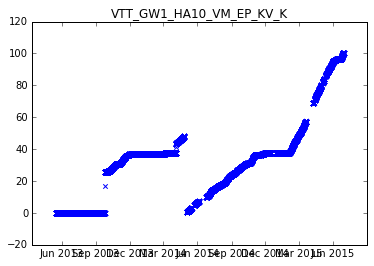

In [10]:
Graph.Show.dic2graph(data_dictionary)

---
* 전처리의 마지막 단계인 interpolation을 실행해보자
* interpolation을 통해 기록된 값이 없는 경우(nan)에 적절한 값을 배정하여 준다

In [14]:
data_dictionary = Preprocess.interpolation(data_dictionary)

data_dictionary

{'file_name': 'VTT_GW1_HA10_VM_EP_KV_K',
 'ts': array([datetime.datetime(2013, 5, 15, 10, 30),
        datetime.datetime(2013, 5, 15, 10, 40),
        datetime.datetime(2013, 5, 15, 10, 50), ...,
        datetime.datetime(2015, 6, 30, 0, 30),
        datetime.datetime(2015, 6, 30, 0, 40),
        datetime.datetime(2015, 6, 30, 0, 50)], dtype=object),
 'value': array([   0.,    0.,    0., ...,  100.,  100.,  100.])}

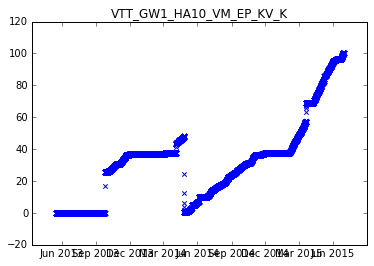

In [12]:
Graph.Show.dic2graph(data_dictionary)

---
위 preprocessing 과정을 통해 data를 분석하기 위한 준비과정이 완료되었음
